## Probability of success

What is the probability that this protocol distills entanglement after n iterations? 

The state before the measurement for the first iteration is 

\begin{align}
    |\varphi_1\rangle &= \mathcal{N}(\zeta)^2 \Big\{ \big( |00\rangle + \zeta^2 |11\rangle \Big) |00\rangle \notag \\
    &+ \zeta \big( |00\rangle + |11\rangle \big) |11\rangle \Big\}
\end{align}

Then, the probability of measuring $|00\rangle$ is 

\begin{equation}
    \Pr(|00\rangle) = \frac{1+|\zeta|^4}{(1+|\zeta|^2)^2} = 1 - \frac{2 |\zeta|^2}{(1+|\zeta|^2)^2}
\end{equation}

On the other hand, the state before the measurement for the second  iteration is 

\begin{align}
    |\varphi_2\rangle &= \mathcal{N}^2(\zeta^2) \Big\{ \Big[ (1+\zeta^2)^2 ( |00\rangle + |11\rangle) + (1-\zeta^2)^2 ( |01\rangle + |10\rangle)  \Big] |00\rangle \notag \\
    &+ \Big[ (1-\zeta^4) (|00\rangle + |01\rangle + |10\rangle + |11\rangle)\Big] |01\rangle \notag \\
    &+ \Big[ (1-\zeta^4) (|00\rangle + |01\rangle + |10\rangle + |11\rangle)\Big] |10\rangle \notag \\
    &+ \Big[ (1+\zeta^2)^2 ( |00\rangle + |11\rangle) + (1-\zeta^2)^2 (|01\rangle + |10\rangle)  \Big] |11\rangle \Big\}
\end{align}

Therefore, the probability of measuring $|00\rangle$ is 

\begin{equation}
    \Pr(|00\rangle) = \frac{1}{4} + \frac{Re^2(\zeta^2)}{(1+|\zeta|^4)^2}
\end{equation}

Notice that the protocol succeeds if the measurement is $|11\rangle$


In [54]:
import numpy as np 
import matplotlib.pyplot as plt 
from numba import njit
import numba

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams.update({'font.size': 15})

### First iteration

Text(0.5, 1.0, 'Probability of success - first iteration')

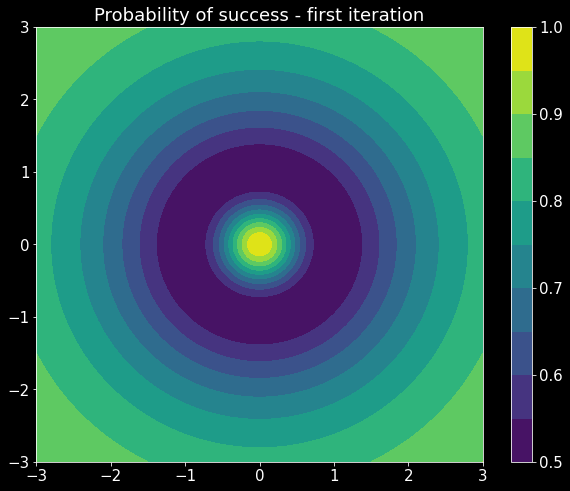

In [16]:
N = 100 # Grid points

real_part = np.linspace(-3,3,N)
imag_part = np.linspace(-3,3,N)

x,y = np.meshgrid(real_part,imag_part)

P = np.zeros((N,N)) # Probability of success

for i in range(N):
    for j in range(N):
        zeta = x[i,j] + 1j*y[i,j]
        P[i,j] = 1 - 2*(np.abs(zeta)**2) / (1 + np.abs(zeta)**2)**2
        
plt.contourf(x,y,P,10)
plt.colorbar()        
plt.title("Probability of success - first iteration")

### Second iteration

Text(0.5, 1.0, 'Probability of success - Second iteration')

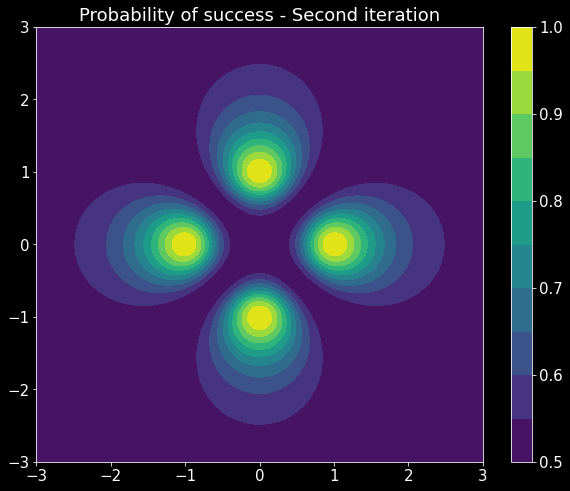

In [18]:
N = 100 # Grid points

real_part = np.linspace(-3,3,N)
imag_part = np.linspace(-3,3,N)

x,y = np.meshgrid(real_part,imag_part)

P = np.zeros((N,N)) # Probability of success

for i in range(N):
    for j in range(N):
        zeta = x[i,j] + 1j*y[i,j]
        P[i,j] = 1/2 + 2*(np.real(zeta**2))**2 / (1+np.abs(zeta)**4)**2 # A factor of 2 has been added to account for the |11> case
        
plt.contourf(x,y,P,10)
plt.colorbar()        
plt.title("Probability of success - Second iteration")

### Success **after** n iterations

These results can be generalised to the probability of success for any nth (odd or even) iteration

\begin{equation}
    P_{\text{odd}}^s(\zeta) = 1 - \frac{2 |g^{\circ n}(\zeta)|^2}{(1+|g^{\circ n}(\zeta)|^2)^2}  
\end{equation}

\begin{equation}
    P_{\text{even}}^s(\zeta) = \frac{1}{2} + \frac{2Re^2(g^{\circ n-1}(\zeta)^2)}{(1+|g^{\circ n-1}(\zeta)|^4)^2}  
\end{equation}

where $g(\zeta) = \frac{2 \zeta^2}{1+\zeta^4}$. Hence, the probability of success after n iterations is given by

\begin{equation}
    P^s_n(\zeta) = \prod_{k=0}^{\lceil n/2 \rceil-1} \left( 1 - \frac{2 |g^{\circ k}(\zeta)|^2}{(1+|g^{\circ k}(\zeta)|^2)^2}   \right)  \prod_{k=0}^{\lfloor n/2 \rfloor -1} \left(  \frac{1}{2} + \frac{2Re^2(g^{\circ k}(\zeta)^2)}{(1+|g^{\circ k}(\zeta)|^4)^2}    \right) 
\end{equation}

In [95]:
# Function that returns the kth nested g 
@njit
def g(zeta,level_k):
    if level_k==0:
        return zeta
    elif level_k>0:
        return 2 * g(zeta,level_k-1)**2 / (1 + g(zeta,level_k-1)**4) 
    
# Function that returns the probabily of sucess in the complex plane    
@njit    
def P_success(n_iter, N_grid, real_part, imag_part):

    P = np.zeros((N_grid,N_grid),dtype=numba.float64) 
    P_even = np.ones((N_grid,N_grid),dtype=numba.float64) # Probability of success for an even iteration
    P_odd = np.ones((N_grid,N_grid),dtype=numba.float64) # Probability of success for an odd iteration
    
    even_bound = int(np.ceil(n_iter/2)) # For even iterations 
    odd_bound = int(np.floor(n_iter/2)) # For odd iterations
    
    for k in range(even_bound): # Even iterations
        for i in range(N_grid):
            for j in range(N_grid):
                zeta = real_part[i] + 1j*imag_part[j]
                P[i,j] = 1 - 2*(abs(g(zeta,k))**2) / (1 + abs(g(zeta,k))**2)**2
        P_even = np.multiply(P_even,P)        
    
    for k in range(odd_bound): # Odd iterations
        for i in range(N_grid):
            for j in range(N_grid):
                zeta = real_part[i] + 1j*imag_part[j]
                P[i,j] =  1/2 + 2*(np.real(g(zeta,k)**2))**2 / (1+abs(g(zeta,k))**4)**2 
        P_odd = np.multiply(P_odd,P)  
    
    return np.multiply(P_even,P_odd)
    

In [98]:
N = 200 # Grid points
n_iter = 18 # Number of iterations

real_part = np.linspace(-2,2,N)
imag_part = np.linspace(-2,2,N)

P = P_success(n_iter,N,real_part,imag_part)

x,y = np.meshgrid(real_part,imag_part)


Text(0, 0.5, '$Im \\zeta$')

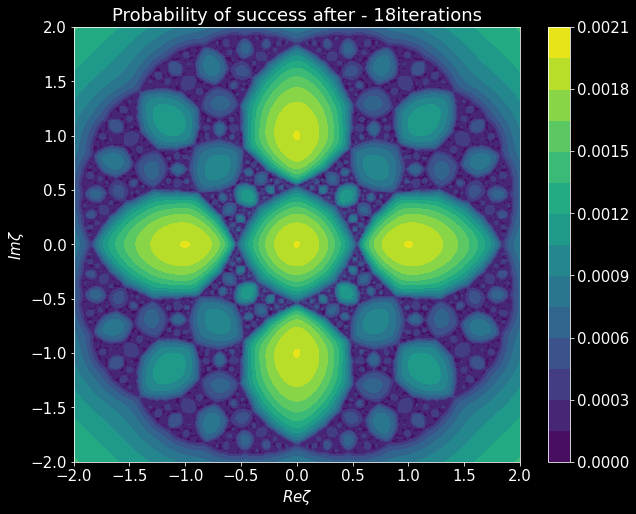

In [103]:
plt.contourf(x,y,P,15)
plt.colorbar()        
plt.title("Probability of success after - "+str(n_iter)+"iterations")
plt.xlabel("$Re \zeta$")
plt.ylabel("$Im \zeta$")